In [2]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from moviepy.audio.io.AudioFileClip import AudioFileClip


2025-03-30 20:57:19.807203: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 20:57:20.204344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743368240.344719   56997 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743368240.387949   56997 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-30 20:57:20.703620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# load an prepare song of choice
song_path = 'inputs'

In [19]:


# #CQT
# def extract_features(audio_file_path):
#     y, sr = librosa.load(audio_file_path, sr=22050, mono=True)
#     cqt = librosa.cqt(y, sr=sr, hop_length=2048, bins_per_octave=24, n_bins=192)  # CQT representation
#     cqt = np.abs(cqt) # Get the absolute amplitude (magnitude) of the CQT
#     # Apply Log Scaling
#     # cqt = np.log1p(cqt)
#     # cqt = librosa.util.normalize(cqt)
#     time_steps = librosa.times_like(cqt[0], sr=sr)  # Get time axis for spectrogram

#     return cqt, time_steps

# def extract_features(audio_file_path):
#     # Load audio file
#     y, sr = librosa.load(audio_file_path, sr=22050, mono=True)

#     # Compute CQT representation
#     cqt = librosa.cqt(y, sr=sr, hop_length=2048, bins_per_octave=24, n_bins=192)
#     cqt = np.abs(cqt)  # Take the magnitude (absolute value)
#     time_steps = librosa.times_like(cqt[0], sr=sr)  # Get time axis for spectrogram

#     # Initialize weights as an array of ones
#     weights = np.ones(cqt.shape)

#     # Iterate over each time step (column in CQT)
#     for t in range(cqt.shape[1]):
#         # Get the energy for each frequency bin at this time step (column)
#         energy_at_t = cqt[:, t]

#         # Identify the indices of the top 4 most prominent bins at this time step
#         top_4_indices = np.argsort(energy_at_t)[-4:]

#         # Apply a weight (e.g., 2) to the top 4 bins at this time step
#         weights[top_4_indices, t] = 5  # You can adjust this weight factor

#     # Apply the weights to the CQT
#     cqt_weighted = cqt * weights

#     # # Optionally, apply logarithmic scaling to compress the dynamic range
#     # cqt_weighted = librosa.amplitude_to_db(cqt_weighted, ref=np.max)

#     return cqt_weighted, time_steps



In [4]:
def convert_to_wav(old_song_path, new_song_path):
    # Load the song file using AudioFileClip
    audio_clip = AudioFileClip(old_song_path)
    
    # Write to .wav format
    audio_clip.write_audiofile(new_song_path)


def extract_features(audio_file_path):
    # Load audio file
    y, sr = librosa.load(audio_file_path, sr=22050, mono=True)

    # Compute CQT representation
    cqt = librosa.cqt(y, sr=sr, hop_length=2048, bins_per_octave=24, n_bins=192)
    cqt = np.abs(cqt)  # Take the magnitude (absolute value)
    time_steps = librosa.times_like(cqt[0], sr=sr)  # Get time axis for spectrogram

    # Define octave weights (you can customize these)
    octave_weights = np.array([1, 1.2, 1.5, 1.8, 2, 2.5, 3, 4])  # Weights for 8 octaves

    # Initialize weights as an array of ones
    weights = np.ones(cqt.shape)

    # Iterate over each time step (column in CQT)
    for t in range(cqt.shape[1]):
        # Get the top 4 most prominent frequency bins for this time step
        top_4_indices = np.argsort(cqt[:, t])[-4:]  # Indices of top 4 bins

        # Determine which octaves these frequencies belong to
        for idx in top_4_indices:
            octave = idx // 24  # Find the octave of this bin
            weights[idx, t] = octave_weights[octave]  # Apply the octave's weight


    # Apply the weights to the CQT
    cqt_weighted = cqt * weights

    return cqt_weighted, time_steps

MoviePy - Writing audio in inputs/processed/song.wav


MoviePy - Done.


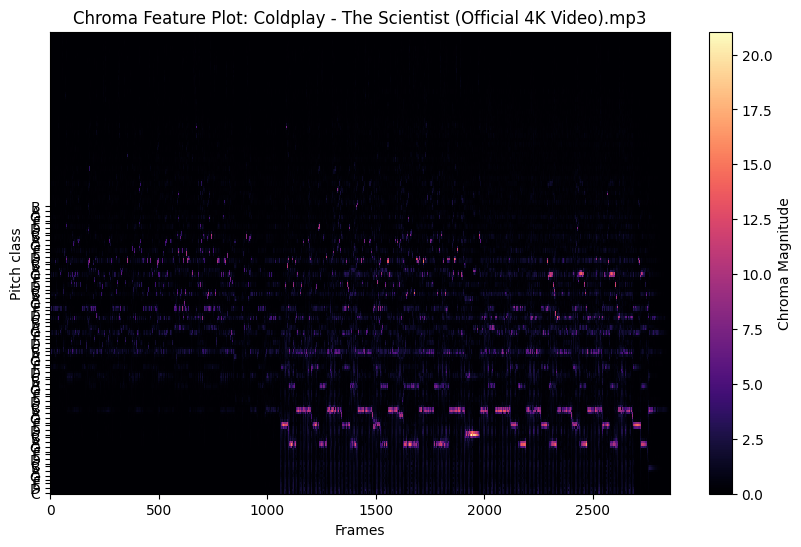

In [5]:
# Convert the song to .wav format   

for file in os.listdir(song_path):
    old_file = file
    if file.endswith('.mid'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.mp3'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.wav'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.flac'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.ogg'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file))
        break
    else :
        print('Invalid file format')
        break

# Extract chroma features
chroma, sr = extract_features(new_song)

# Plotting the chroma features
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma, x_axis='frames', y_axis='chroma', sr=sr)
plt.colorbar(label='Chroma Magnitude')
plt.title(f'Chroma Feature Plot: {old_file}')
plt.show()


In [6]:
# Load the trained model
model_path = 'accordo_ai_model_CQT8.keras'
model = tf.keras.models.load_model(model_path, compile=False)

W0000 00:00:1743368262.362672   56997 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# Reshape input chroma features to match model's expected input shape
X_input_sample = chroma.T  # Shape: (time_steps, 12)

# Define the fixed sequence length
seq_length = 300
hop_length = 2048
sample_rate = 22050

# Calculate the time duration of each timestep
time_per_timestep = hop_length / sample_rate

# Process input in overlapping chunks of 300 time steps
predictions_root = []
predictions_bass = []
predictions_triad = []
predictions_fourth = []

predicted_chord_vector = []

for i in range(0, X_input_sample.shape[0] - seq_length + 1, seq_length):
    chunk = X_input_sample[i : i + seq_length]  # Take a 300-time-step chunk
    chunk = np.expand_dims(chunk, axis=0)  # Add batch dimension (1, 300, 12)
    
    # Predict using the model
    predictions = model.predict(chunk, verbose=0)
    
    # Store the predicted outputs
    predictions_root.append(np.argmax(predictions[0], axis=-1))
    predictions_bass.append(np.argmax(predictions[1], axis=-1))
    predictions_triad.append(np.argmax(predictions[2], axis=-1))
    predictions_fourth.append(np.argmax(predictions[3], axis=-1))

    # Convert predictions into a single array
    predicted_root = np.concatenate(predictions_root)
    predicted_bass = np.concatenate(predictions_bass)
    predicted_triad = np.concatenate(predictions_triad)
    predicted_fourth = np.concatenate(predictions_fourth)

    # print(i)
    
    for j in range(seq_length):
        timestep = i + j
        time_in_seconds = timestep * time_per_timestep  # Convert timestep index to seconds
        root_pred = int(predicted_root[0][j])
        bass_pred = int(predicted_bass[0][j])
        triad_pred = int(predicted_triad[0][j])
        fourth_pred = int(predicted_fourth[0][j])
    
        # Print the predictions for each timestep, along with the time in seconds
        print(f"Timestep {timestep} ({time_in_seconds:.2f} seconds): [Root: {root_pred}, Bass: {bass_pred}, Triad: {triad_pred}, Fourth: {fourth_pred}]")
        predicted_chord_vector.append([round(time_in_seconds, 4), [root_pred, bass_pred, triad_pred, fourth_pred]])


chordsdf = pd.DataFrame(predicted_chord_vector, columns=['timestep', 'Chord_vector'])
print(chordsdf)

Timestep 0 (0.00 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 1 (0.09 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 2 (0.19 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 3 (0.28 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 4 (0.37 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 5 (0.46 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 6 (0.56 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 7 (0.65 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 8 (0.74 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 9 (0.84 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 10 (0.93 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 11 (1.02 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 12 (1.11 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 13 (1.21 seconds): [Root: 12, Bass: 12, Triad: 6, Fourth: 4]
Timestep 14 (1.30 seconds): [R

In [8]:
# Define categories (merging 'X' into 'N')
roots = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'N', 'X']
basses = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'N', 'X']
triads = ['Major', 'Minor', 'Diminished', 'Augmented', 'Sus2', 'Sus4', 'N', 'X']
fourths = ['dim7', 'min7', 'maj7', 'maj6', 'N', 'X']

def vector_to_chord(vector):

    chord_vocab_file = "IsoDatasetPro/chord_vocabulary_12_keys.csv"
    chord_vocab_df = pd.read_csv(chord_vocab_file)
    """
    Convert a vector of indices back to a chord label (e.g., [0, 0, 0, 1] -> 'C:maj7')
    by referring to the chord vocabulary DataFrame.
    """
    root_index, bass_index, triad_index, fourth_index = vector

    # Convert indices back to values using the corresponding arrays
    root_value = roots[root_index]
    bass_value = basses[bass_index]
    triad_value = triads[triad_index]
    fourth_value = fourths[fourth_index]

    # Find the corresponding row in the chord vocabulary
    chord_row = chord_vocab_df[
        (chord_vocab_df['root'] == root_value) &
        (chord_vocab_df['bass'] == bass_value) &
        (chord_vocab_df['triad'] == triad_value) &
        (chord_vocab_df['fourth'] == fourth_value)
    ]

    if chord_row.empty:
        # print(f"Chord with values ({root_value}, {bass_value}, {triad_value}, {fourth_value}) not found in the chord vocabulary.")
        print('Error')
        return 'N'
    else :
        # Return the chord label
        print(chord_row['chord_name'].values[0])
        return chord_row['chord_name'].values[0]

In [9]:
chordsdf['Chord_label'] = chordsdf['Chord_vector'].apply(vector_to_chord)
chordsdf


N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
Error
Error
F:maj
F:maj
F:maj
F:maj
Error
Error
N
N
N
N
N
Error
N
N
N
N
N
Error
Error
Error
Error
Error
Error
Error
Error
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
G#:maj
Error
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
F:maj
C:maj
C:maj
C:maj
C:maj
Error
Error
Error
C:maj
C:maj
Error
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
N
Error
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
Error
C:maj
C:maj
C:maj
C:maj
Error
Error
Error
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj
D#:maj


,timestep,Chord_vector,Chord_label
0,0.0000,"[12, 12, 6, 4]",N
1,0.0929,"[12, 12, 6, 4]",N
2,0.1858,"[12, 12, 6, 4]",N
3,0.2786,"[12, 12, 6, 4]",N
4,0.3715,"[12, 12, 6, 4]",N
...,...,...,...
2695,250.3111,"[5, 5, 2, 4]",F:dim
2696,250.4040,"[5, 5, 2, 4]",F:dim
2697,250.4969,"[5, 5, 2, 4]",F:dim
2698,250.5898,"[5, 5, 2, 4]",F:dim


In [ ]:
print(chordsdf['Chord_vector'][56])

[12, 12, 6, 4]


In [ ]:

chordsdf.to_csv('Outputs/chords.csv')

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 192)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 300, 192)  │    221,952 │ input_layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 300, 192)  │        768 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 300, 192)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 300, 144)  │    152,640 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 300, 144)  │        576 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 300, 144)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 300, 128)  │    107,008 │ dropout_1[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 300, 128)  │        512 │ bidirectional_2[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 300, 128)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 300, 96)   │     67,968 │ dropout_2[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 300, 96)   │        384 │ bidirectional_3[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 300, 96)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 300, 128)  │     12,416 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ root_output (Dense) │ (None, 300, 14)   │      1,806 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bass_output (Dense) │ (None, 300, 14)   │      1,806 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ triad_output        │ (None, 300, 8)    │      1,032 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fourth_output       │ (None, 300, 6)    │        774 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,706,688 (6.51 MB)

 Trainable params: 568,522 (2.17 MB)

 Non-trainable params: 1,120 (4.38 KB)

 Optimizer params: 1,137,046 (4.34 MB)

In [ ]:
import json

# Extract model configuration
config = model.get_config()
print(json.dumps(config, indent=4))

# Get optimizer details
print(model.optimizer)

{
    "name": "functional",
    "trainable": true,
    "layers": [
        {
            "module": "keras.layers",
            "class_name": "InputLayer",
            "config": {
                "batch_shape": [
                    null,
                    300,
                    192
                ],
                "dtype": "float32",
                "sparse": false,
                "name": "input_layer"
            },
            "registered_name": null,
            "name": "input_layer",
            "inbound_nodes": []
        },
        {
            "module": "keras.layers",
            "class_name": "Bidirectional",
            "config": {
                "name": "bidirectional",
                "trainable": true,
                "dtype": {
                    "module": "keras",
                    "class_name": "DTypePolicy",
                    "config": {
                        "name": "float32"
                    },
                    "registered_name": null
          

In [ ]:
if hasattr(model, 'loss'):
    print("Loss function:", model.loss)
else:
    print("Loss function not found in the saved model.")


Loss function: {'root_output': 'categorical_crossentropy', 'bass_output': 'categorical_crossentropy', 'triad_output': 'KLDivergence', 'fourth_output': 'categorical_crossentropy'}


In [ ]:
optimizer_config = model.optimizer.get_config()
print(optimizer_config)


{'name': 'adam', 'learning_rate': 0.0001228800101671368, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [ ]:
if hasattr(model, 'losses'):
    print("Loss weights:", model.losses)
else:
    print("No loss weights found in the saved model.")


Loss weights: []


In [ ]:
export_path = 'models/FinalTF/'
version = 1
export_path = os.path.join(export_path, str(version))
model.export(export_path)

INFO:tensorflow:Assets written to: models/FinalTF/1/assets


INFO:tensorflow:Assets written to: models/FinalTF/1/assets


Saved artifact at 'models/FinalTF/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300, 192), dtype=tf.float32, name='input_layer')
Output Type:
  List[TensorSpec(shape=(None, 300, 14), dtype=tf.float32, name=None), TensorSpec(shape=(None, 300, 14), dtype=tf.float32, name=None), TensorSpec(shape=(None, 300, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 300, 6), dtype=tf.float32, name=None)]
Captures:
  140660583098192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583097232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583096656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583098000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583098960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583098384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583097424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140660583097616: TensorSpe